## Import the relevant libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Generation

In [7]:
observations = 10000

xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(-10,10,(observations,1))


# np.column_stack() = stack 1-D arrays as columns into a 2-D array.

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2 * xs + 5 + noise


# np.savez() = saves n-dimensional arrays in npz format, using a certain keyword(label)
# for each array

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)


## Solving with TensorFlow

In [8]:
training_data = np.load('TF_intro.npz')

In [25]:
input_size = 2     # xs and zs

output_size = 1    # y

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1, 
                                                                            maxval = 0.1),
                          bias_initializer = tf.random_uniform_initializer(minval = -0.1, 
                                                                            maxval = 0.1))
])

custom_optimazer = tf.keras.optimizers.SGD(learning_rate = 0.2)

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
313/313 - 0s - loss: 3.0908 - 417ms/epoch - 1ms/step
Epoch 2/100
313/313 - 0s - loss: 0.3458 - 177ms/epoch - 565us/step
Epoch 3/100
313/313 - 0s - loss: 0.3448 - 177ms/epoch - 567us/step
Epoch 4/100
313/313 - 0s - loss: 0.3426 - 177ms/epoch - 565us/step
Epoch 5/100
313/313 - 0s - loss: 0.3442 - 179ms/epoch - 573us/step
Epoch 6/100
313/313 - 0s - loss: 0.3439 - 178ms/epoch - 570us/step
Epoch 7/100
313/313 - 0s - loss: 0.3440 - 178ms/epoch - 568us/step
Epoch 8/100
313/313 - 0s - loss: 0.3443 - 177ms/epoch - 564us/step
Epoch 9/100
313/313 - 0s - loss: 0.3427 - 177ms/epoch - 566us/step
Epoch 10/100
313/313 - 0s - loss: 0.3450 - 175ms/epoch - 558us/step
Epoch 11/100
313/313 - 0s - loss: 0.3423 - 173ms/epoch - 554us/step
Epoch 12/100
313/313 - 0s - loss: 0.3438 - 174ms/epoch - 556us/step
Epoch 13/100
313/313 - 0s - loss: 0.3440 - 174ms/epoch - 557us/step
Epoch 14/100
313/313 - 0s - loss: 0.3434 - 175ms/epoch - 558us/step
Epoch 15/100
313/313 - 0s - loss: 0.3428 - 172ms/epoch - 54

* Tensorflow 2 is based on Keras, so that's the module needed to built a model.


* tf.keras.Sequential() = function that specifies how the model will be laid down ('stacks layers').


* Linear combination + Output = Layer


* output = np.dot(inputs, weights) + bias


* tf.keras.layers.Dense(output size) = takes the inputs provided to the model and calculated the dot product of the inputs and the weights and adds the bias (also applies activation function(optional)).


* tf.keras.layers.Dense(output_size, kernel_initializer, bias_initializer) = function that laying down the model (used to 'stack layers') and initialize weights


* tf.keras.optimazers.SGD(learning-rate) = stochastic gradient descent optimazer, including support for learning rate, momentum, decay, etc.


* model.compile(optimizer, loss) = configures the model for training.


* Epoch = iteration over the full dataset


* verbose = 0 , stands for 'silent' or no output about the training is displayed


* verbose = 1, stands for 'progress bar'


* verbose = 2, stands for 'one line per epoch'


* 2x - 3z + 5 + noise

## Extract The Weights And Bias

In [26]:
model.layers[0].get_weights()

[array([[ 2.016356  ],
        [-0.01114745]], dtype=float32),
 array([5.0070696], dtype=float32)]

In [27]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.016356  ],
       [-0.01114745]], dtype=float32)

In [28]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0070696], dtype=float32)

## Extract The Outputs (Make Predictions)

In [29]:
# model.predict_on_batch(data) = calculates the outputs given inputs

model.predict_on_batch(training_data['inputs']).round(1)

array([[-10.7],
       [ 21.5],
       [ -6.4],
       ...,
       [ 22.9],
       [ -4.9],
       [  1.8]], dtype=float32)

In [30]:
training_data['targets'].round(1)

array([[-10.4],
       [ 21.2],
       [ -6.8],
       ...,
       [ 22.9],
       [ -5.7],
       [  2.7]])

## Plotting The Data

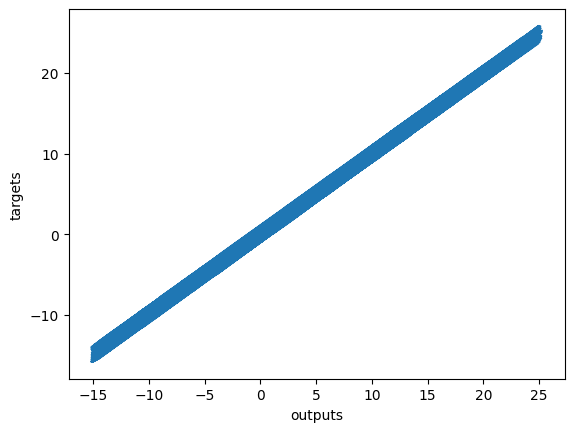

In [31]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), 
        np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [22]:
targets = targets.reshape(observations)
fig = plt.figure()
ax = fig.add_subplor(111, projections = '3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targest')
ax.view_init(azim = 100)
plt.show()
targets = targets.reshape(observations,1)

NameError: name 'targets' is not defined